## Required Frameworks

In [ ]:
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
import cv2

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Read The Data

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/TEMP/PROJECT/Handwritten Digit & Character Recognition System/A_Z_Handwritten_Data.csv").astype('float32')

# Printing The First 10 Images Using Data.Head(10)
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[10 rows x 785 columns]


## Split Data Into Images And Their Labels

In [ ]:
# Splitting the data read into the images & their corresponding labels.
# The ‘0’ contains the labels, & so we drop the ‘0’ column from the data dataframe read & use it in the y to form the labels.
X = data.drop('0',axis = 1)
y = data['0']

## Reshaping The Data In The CSV File So That It Can Be Displayed As An Image

In [ ]:
# Also, we are reshaping the train & test image data so that they can be displayed as an image, as initially in the CSV file they were present as 784 columns of pixel data.
# So we convert it to 28×28 pixels.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train Data Shape: ", train_x.shape)
print("Test Data Shape: ", test_x.shape)

Train Data Shape:  (297960, 28, 28)
Test Data Shape:  (74490, 28, 28)


In [ ]:
# All the labels are present in the form of floating point values, that we convert to integer values, & so we create a dictionary word_dict to map the integer values with the characters.
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

## Plotting The Number Of Alphabets In The Dataset

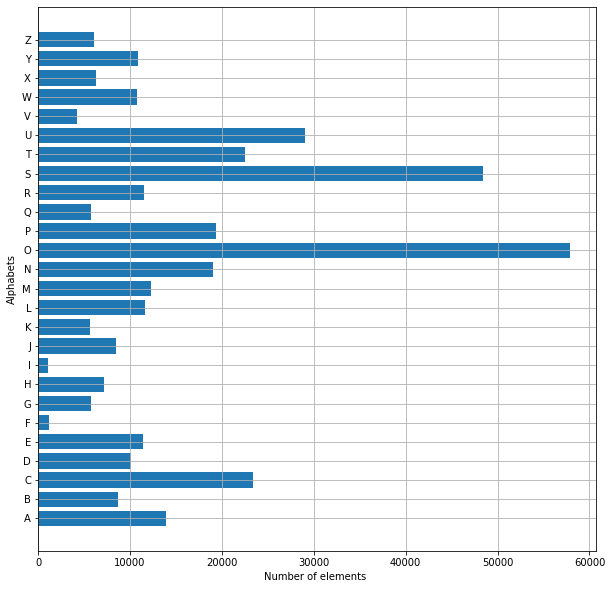

In [ ]:
# Firstly we convert the labels into integer values and append into the count list according to the label.
# This count list has the number of images present in the dataset belonging to each alphabet.
# Now we create a list – alphabets containing all the characters using the values() function of the dictionary.
# Now using the count & alphabets lists we draw the horizontal bar plot.

y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

## Shuffling The Data

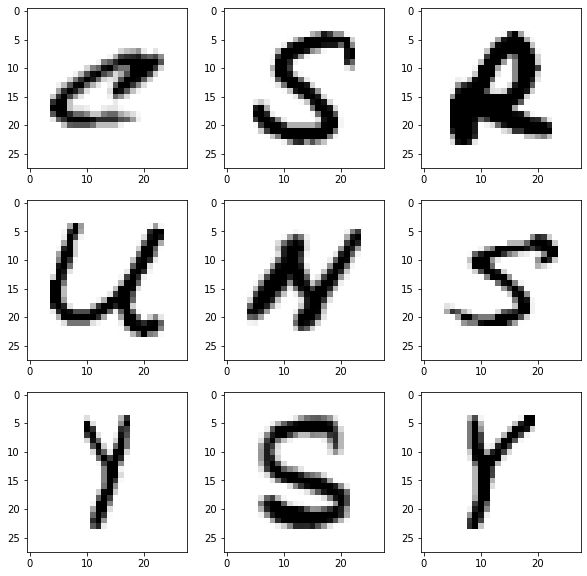

In [ ]:
# Now we shuffle some of the images of the train set.
# The shuffling is done using the shuffle() function so that we can display some random images.
# We then create 9 plots in 3×3 shape & display the thresholded images of 9 alphabets.
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

####The Above Image Depicts The Grayscale Images That We Got From The Dataset

## Data Reshaping

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

# Now we reshape the train & test image dataset so that they can be put in the model.

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [ ]:
# Here we convert the single float values to categorical values.
# This is done as the CNN model takes input of labels & generates the output as a vector of probabilities.
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
# The convolution layers are generally followed by maxpool layers that are used to reduce the number of features extracted and ultimately the output of the maxpool and layers and convolution layers are flattened into a vector of single dimension and are given as an input to the Dense layer.
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
# Here we are compiling the model, where we define the optimizing function & the loss function to be used for fitting.
# The optimizing function used is Adam, that is a combination of RMSprop & Adagram optimizing algorithms.
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# The dataset is very large so we are training for only a single epoch, however, as required we can even train it for multiple epochs.
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 397s 43ms/step - loss: 0.3805 - accuracy: 0.9059 - val_loss: 0.0766 - val_accuracy: 0.9790


In [ ]:
# Now we are getting the model summary that tells us what were the different layers defined in the model & also we save the model using model.save() function.
model.summary()
model.save(r'Character_Model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

## Getting the Train & Validation Accuracies & Losses

In [ ]:
# Accuracy 
print("The Validation Accuracy Is :", history.history['val_accuracy'])
print("The Training Accuracy Is :", history.history['accuracy'])

# Loss
print("The Validation Loss Is :", history.history['val_loss'])
print("The Training Loss Is :", history.history['loss'])

The Validation Accuracy Is : [0.9789904952049255]
The Training Accuracy Is : [0.9542052745819092]
The Validation Loss Is : [0.07663743942975998]
The Training Loss Is : [0.1649303436279297]


## Doing Some Predictions on Test Data

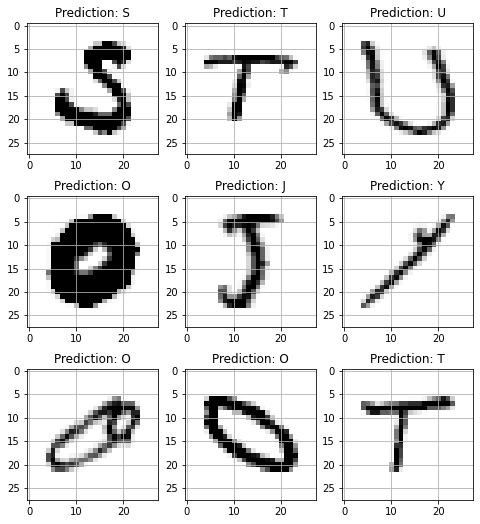

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

## Doing Prediction on User Input Image

In [26]:
img = cv2.imread(r'/content/drive/MyDrive/TEMP/PROJECT/Handwritten Digit & Character Recognition System/c1034_02_00028.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [27]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

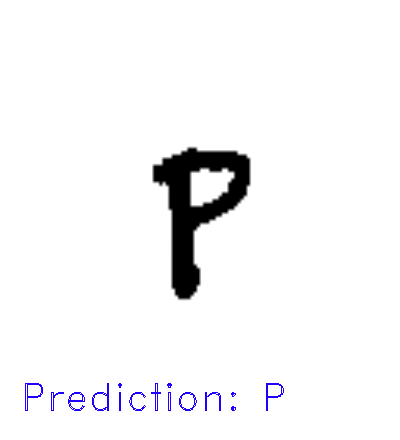

In [28]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2_imshow(img)